In [1]:
import pandas as pd
import os
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False
pd.options.mode.chained_assignment = None  # default='warn'
plt.rcParams['font.family'] = 'Malgun Gothic'
font = {'size': 16}
matplotlib.rc('font', **font)

In [2]:
basedir = './국토교통부_실거래가_공개시스템/땅값분석/'
yunrip_df = pd.read_csv(basedir + 'yunrip_30.csv')
commerce_df = pd.read_csv(basedir + 'commerce_30.csv')
land_df = pd.read_csv(basedir + 'land.csv')

In [3]:
common_cols = ['시군구', '번지', '용도지역', '도로조건', '계약날짜', '대지면적(㎡)', '거래금액(만원)', '단가(㎡)', '단가(평)', '거래유형', '건물연식']
common_df = pd.concat([yunrip_df[common_cols], commerce_df[common_cols], land_df[[col for col in land_df.columns if col not in ['지목', '지분구분', '해제사유발생일']]]])
common_df['계약날짜'] = pd.to_datetime(common_df['계약날짜'], format='%Y-%m-%d')
print(common_df.shape)
common_df.head()

(168873, 11)


,시군구,번지,용도지역,도로조건,계약날짜,대지면적(㎡),거래금액(만원),단가(㎡),단가(평),거래유형,건물연식
0,서울특별시 강남구 개포동,171-13,제2종일반주거지역,8m미만,2019-10-23,56.1,60000.0,1069.518717,3535.598930,연립/다세대,31.0
1,서울특별시 강남구 개포동,1239-7,제2종일반주거지역,8m미만,2018-06-14,45.0,52000.0,1155.555556,3820.018222,연립/다세대,30.0
2,서울특별시 강남구 개포동,1239-7,제2종일반주거지역,8m미만,2019-03-05,45.0,50000.0,1111.111111,3673.094444,연립/다세대,31.0
3,서울특별시 강남구 개포동,1239-7,제2종일반주거지역,8m미만,2020-06-01,45.0,58000.0,1288.888889,4260.789556,연립/다세대,32.0
4,서울특별시 강남구 개포동,1239-7,제2종일반주거지역,8m미만,2020-06-13,45.0,57000.0,1266.666667,4187.327667,연립/다세대,32.0


In [4]:
dandok_filenames = [f for f in os.listdir('./국토교통부_실거래가_공개시스템/단독다가구매매/') if (f.endswith('.csv'))&('(매매)' in f)]
dandok_filenames

['단독다가구(매매)_실거래가_20130101_20131231.csv',
 '단독다가구(매매)_실거래가_20140101_20141231.csv',
 '단독다가구(매매)_실거래가_20150101_20151231.csv',
 '단독다가구(매매)_실거래가_20160101_20161231.csv',
 '단독다가구(매매)_실거래가_20170101_20171231.csv',
 '단독다가구(매매)_실거래가_20180101_20181231.csv',
 '단독다가구(매매)_실거래가_20190101_20191231.csv',
 '단독다가구(매매)_실거래가_20200101_20201231.csv',
 '단독다가구(매매)_실거래가_20210101_20210406.csv']

In [5]:
dfs_list = []
for f in dandok_filenames:
    df = pd.read_csv('./국토교통부_실거래가_공개시스템/단독다가구매매/' + f, encoding='euc-kr', header=15)
    if '해제사유발생일' in df.columns:
        df = df.drop(columns=['해제사유발생일'])
    dfs_list.append(df)

In [6]:
dandok_df = pd.concat(dfs_list).reset_index(drop=True)
print(dandok_df.shape)
dandok_df.head()

(109267, 11)


,시군구,번지,주택유형,도로조건,연면적(㎡),대지면적(㎡),계약년월,계약일,거래금액(만원),건축년도,도로명
0,서울특별시 강남구 논현동,8*,다가구,8m미만,329.78,165.4,201305,24,"177,500",1993.0,논현로138길
1,서울특별시 강남구 논현동,1**,다가구,8m미만,335.90,171.4,201312,18,"173,500",1990.0,학동로12길
2,서울특별시 강남구 논현동,7*,다가구,8m미만,435.32,177.2,201304,23,"138,000",1992.0,논현로146길
3,서울특별시 강남구 논현동,1**,다가구,8m미만,347.10,181.9,201308,28,"169,000",1991.0,선릉로135길
4,서울특별시 강남구 논현동,2**,다가구,8m미만,401.33,193.8,201305,21,"179,000",1997.0,논현로124길


In [7]:
dandok_df['구'] = dandok_df['시군구'].apply(lambda x: x.split(' ')[1])
dandok_df['동'] = dandok_df['시군구'].apply(lambda x: x.split(' ')[2])
dandok_df['거래금액(만원)'] = dandok_df['거래금액(만원)'].apply(lambda x: int(x.replace(',','')))
dandok_df['대지면적(㎡)'] = dandok_df['대지면적(㎡)'].apply(float)
dandok_df['단가(평)'] = dandok_df['거래금액(만원)'] / dandok_df['대지면적(㎡)'] * 3.305785

In [8]:
def day_modifier(x):
    # x is a number
    
    if pd.isna(x) == True:
        return x
    else:
        x = str(x)
        if len(x) == 1:
            return '0' + x
        else:
            return x

In [9]:
dandok_df['계약날짜'] = dandok_df['계약년월'].apply(lambda x: str(x)[:4]) + '-' +\
dandok_df['계약년월'].apply(lambda x: str(x)[-2:]) + '-' + dandok_df['계약일'].apply(day_modifier)

In [10]:
dandok_df['계약날짜'] = pd.to_datetime(dandok_df['계약날짜'])

In [11]:
dandok_df.drop(columns=['계약년월', '계약일'], inplace=True)

In [12]:
target = '도곡동'
target_purpose = '2종일반'
계약일자시점 = 2018

In [13]:
target_df = common_df[(common_df['시군구'].str.contains(target))&(common_df['용도지역'].str.contains(target_purpose))&(common_df['계약날짜'].dt.year >= 계약일자시점)].sort_values(['단가(평)'], ascending=False)
print(target_df.shape)
target_df.head()

(55, 11)


,시군구,번지,용도지역,도로조건,계약날짜,대지면적(㎡),거래금액(만원),단가(㎡),단가(평),거래유형,건물연식
9162,서울특별시 강남구 도곡동,4**,제2종일반주거,8m미만,2020-11-10,216.30,450000.0,2080.443828,6877.500000,상업/업무,30.0
6193,서울특별시 강남구 도곡동,9**,제2종일반주거,12m미만,2018-03-21,675.10,1190000.0,1762.701822,5827.113242,상업/업무,30.0
105547,서울특별시 강남구 도곡동,1**,제2종일반주거지역,8m미만,2020-03-16,264.00,400000.0,1515.151515,5008.765152,토지,NaN
102854,서울특별시 강남구 도곡동,4**,제2종일반주거지역,8m미만,2019-11-04,239.80,360000.0,1501.251043,4962.813178,토지,NaN
305,서울특별시 강남구 도곡동,945-12,제2종일반주거지역,8m미만,2020-10-19,40.28,59300.0,1472.194638,4866.758950,연립/다세대,33.0


In [14]:
dandok_target_df = dandok_df[(dandok_df['시군구'].str.contains(target))&(dandok_df['계약날짜'].dt.year >= 계약일자시점)]
print(dandok_target_df.shape)
dandok_target_df.head()

(12, 13)


,시군구,번지,주택유형,도로조건,연면적(㎡),대지면적(㎡),거래금액(만원),건축년도,도로명,구,동,단가(평),계약날짜
70700,서울특별시 강남구 도곡동,9**,다가구,8m미만,127.82,79.0,110000,1991.0,강남대로44길,강남구,도곡동,4602.991772,2018-04-28
84650,서울특별시 강남구 도곡동,9**,다가구,8m미만,481.55,235.3,400000,1986.0,강남대로54길,강남구,도곡동,5619.694008,2019-12-24
84651,서울특별시 강남구 도곡동,9**,단독,8m미만,849.68,325.2,400000,2000.0,도곡로2길,강남구,도곡동,4066.156212,2019-10-18
94942,서울특별시 강남구 도곡동,1**,다가구,8m미만,119.10,83.0,107000,1995.0,남부순환로381길,강남구,도곡동,4261.674639,2020-08-20
94943,서울특별시 강남구 도곡동,5**,다가구,8m미만,568.51,300.0,401523,1996.0,논현로57길,강남구,도곡동,4424.495702,2020-06-02


<AxesSubplot:>

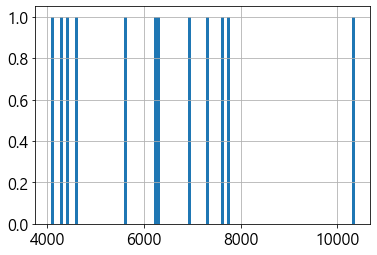

In [15]:
dandok_target_df['단가(평)'].hist(bins=100)

In [16]:
dandok_target_df['단가(평)'].quantile(0.95)

8914.97346943185

In [17]:
target_df['단가(평)'].quantile(0.90)

4653.877585449932

In [18]:
#target_df = target_df[target_df['단가(평)'] <= target_df['단가(평)'].quantile(0.9)]
target_df.shape

(55, 11)

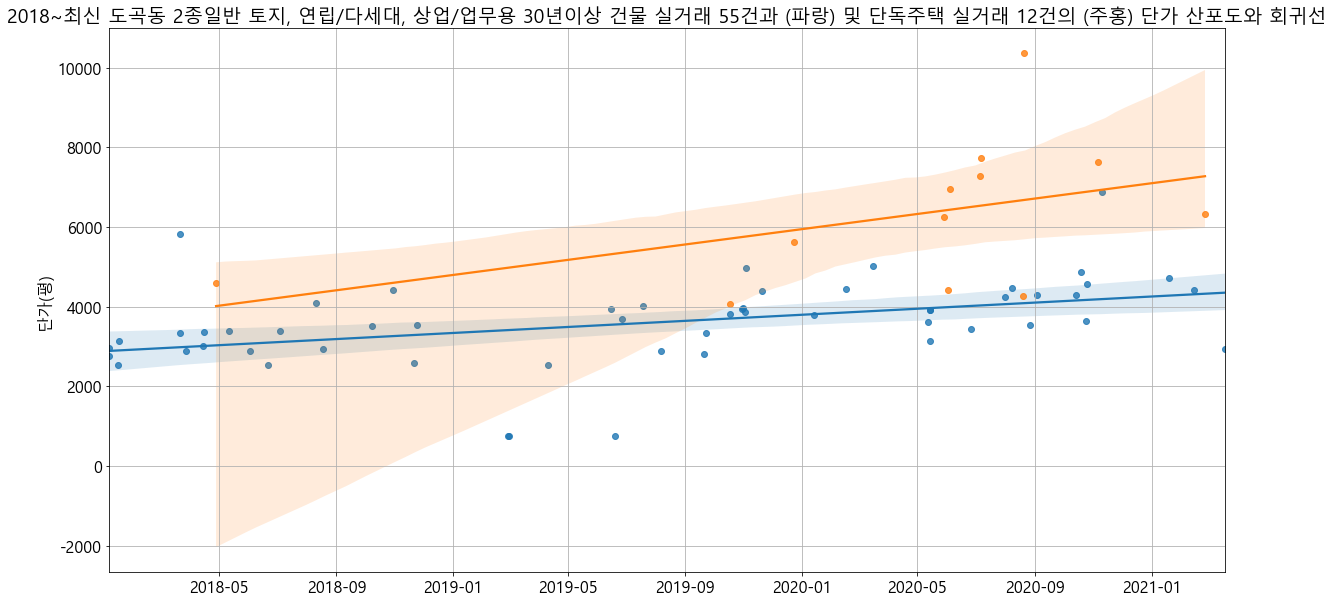

In [20]:
font = {'size': 16}
matplotlib.rc('font', **font)
f, ax = plt.subplots(figsize=(20,10))
plt.title('{}~최신 {} {} 토지, 연립/다세대, 상업/업무용 30년이상 건물 실거래 {}건과 (파랑) 및 단독주택 실거래 {}건의 (주홍) 단가 산포도와 회귀선'.format(계약일자시점, target, target_purpose, target_df.shape[0], dandok_target_df.shape[0]))
plt.grid(True)
ax.xaxis.update_units(target_df['계약날짜'])
sns.regplot(x=ax.xaxis.convert_units(target_df['계약날짜']), y=target_df['단가(평)'])
ax.xaxis.update_units(dandok_target_df['계약날짜'])
sns.regplot(x=ax.xaxis.convert_units(dandok_target_df['계약날짜']), y=dandok_target_df['단가(평)'])
plt.savefig(basedir + '{}{}/산포도.png'.format(target, target_purpose))

In [ ]:
font = {'size': 10}
matplotlib.rc('font', **font)
f, ax = plt.subplots(figsize=(10,6))
plt.title('{}~최신 {} {} 토지, 연립/다세대 및 상업/업무용 30년이상 건물 실거래 {}건의 단가 분포도'.format(계약일자시점, target, target_purpose, target_df.shape[0]))
sns.histplot(target_df['단가(평)'])
plt.savefig(basedir + '{}{}/분포도.png'.format(target, target_purpose))
plt.show()
plt.clf()

description = target_df['단가(평)'].describe()
print('거래량:', description['count'])
print('평균:', description['mean'])
print('표준편차:', description['std'])
print('최소:', description['min'])
print('25분위:', description['25%'])
print('중간값:', description['50%'])
print('75분위:', description['75%'])
print('최대:', description['max'])


In [ ]:
for year in sorted(target_df['계약날짜'].dt.year.unique()):
    year_df = target_df[target_df['계약날짜'].dt.year == year]
    
    f, ax = plt.subplots(figsize=(10,6))
    plt.title('{}년 {} {}주거지역 토지 및 연립/다세대, 상업/업무용 30년이상 건물 실거래 {}건의 단가 분포도'.format(year, target, target_purpose, year_df.shape[0]))
    plt.ylabel('거래량')
    sns.histplot(year_df['단가(평)'])
    plt.savefig(basedir + '{}{}/{}분포도.png'.format(target, target_purpose, year))
    plt.show()
    plt.clf()
    
    description = year_df['단가(평)'].describe()
    print('거래량:', description['count'])
    print('평균:', description['mean'])
    print('표준편차:', description['std'])
    print('최소:', description['min'])
    print('25분위:', description['25%'])
    print('중간값:', description['50%'])
    print('75분위:', description['75%'])
    print('최대:', description['max'])

In [ ]:
target_df = target_df.sort_values(['단가(평)'], ascending=False).reset_index(drop=True)

In [ ]:
target_df.head(20)

In [ ]:
target_df.tail(20)

In [ ]:
target_df.to_excel('./국토교통부_실거래가_공개시스템/땅값분석/{}{}/{}_{}_땅값분석.xlsx'.format(target, target_purpose, target, target_purpose), index=False)